In [ ]:
import pandas as pd
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
messages = pd.read_csv('SMSSpamCollection.txt', sep='\t', names=['label','messages'])

In [4]:
messages.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
ps = PorterStemmer()

In [6]:
corpus =[]
for i in range(len(messages)):
    review = re.sub('[^A-Za-z0-9]', ' ', messages['messages'][i])
    review = review.lower()
    review = review.strip()
    review = [ps.stem(word) for word in review if word  not in stopwords.words('english')]
    corpus.append(' '.join(review))

## Word2Vec
#### - Implemented using ```gensin``` library
#### - We can eithe use PRe-Trained model that is , google-new-300 or we can train our Word2Vec model from scratch
### What to use PreTrained or Training form scratch:
#### - If 75% of teh texts of the dataset are alrdy present in the pretrained model, we can go wth teh Pre-Trained model
#### - Else build the Word2Vec Model from scratch

# Average Word2Vec

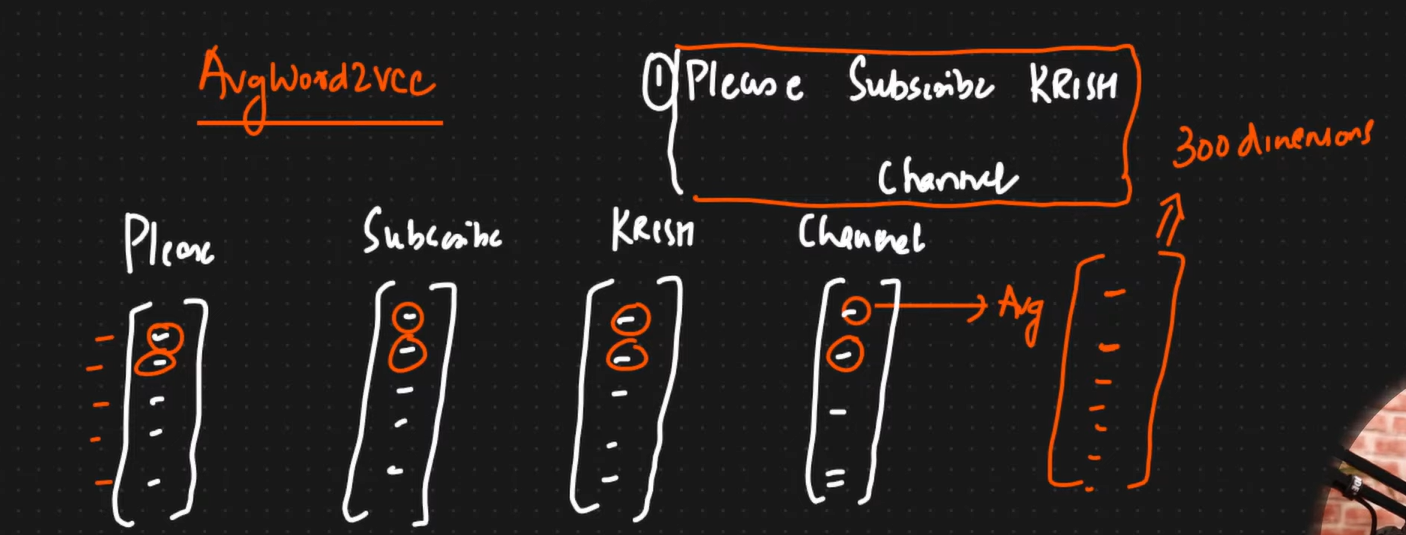

### - this is used when we want to represent the Whole Document in a particular dimension rather than representing each word as pre-determinmed dimension
### - For example , when we use google-new-300, for each word we will get 300 dimension vector, but when we want the whole document to be represented as a 300 dimension vector, we just sum up all the vectors and take average this results in Average Word2vec

### now applying lemmatitzation

In [32]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()
corpus =[]
for i in range(len(messages)):
    review = re.sub('[^A-Za-z0-9]', ' ', messages['messages'][i])
    review = review.lower()
    review = review.split()
    review = [lm.lemmatize(word) for word in review if word not in stopwords.words('english')]
    corpus.append(' '.join(review))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
corpus

['g   u n l   j u r n g   p n     c r z       v l b l e   n l   n   b u g   n   g r e   w r l   l   e   b u f f e         c n e   h e r e   g   r e   w',
 'k   l r         j k n g   w f   u   n',
 'f r e e   e n r   n   2     w k l   c p     w n   f   c u p   f n l   k   2 1     2 0 0 5     e x   f     8 7 1 2 1     r e c e v e   e n r   q u e n     x   r e     c     p p l   0 8 4 5 2 8 1 0 0 7 5 v e r 1 8  ',
 'u   u n       e r l   h r         u   c   l r e   h e n  ',
 'n h     n     h n k   h e   g e     u f     h e   l v e   r u n   h e r e   h u g h',
 'f r e e g   h e   h e r e   r l n g       b e e n   3   w e e k     n w   n   n   w r   b c k         l k e   e   f u n   u   u p   f r     l l     b   k     x x x     c h g     e n       1   5 0     r c v',
 'e v e n     b r h e r     n   l k e     p e k   w h   e     h e   r e   e   l k e     p e n',
 '  p e r   u r   r e q u e     e l l e   e l l e     r u   n n n u n g n e   n u r u n g u   v e       h   b e e n   e     u r   

In [15]:
pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 42.9 MB/s eta 0:00:00


In [18]:
import gensim
import gensim.downloader as api

#### simple_preprocess() => Converts A **document** into list of lowercase tokens

In [20]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [33]:
corpus[0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [26]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [34]:
words = []
for sent in corpus:
  sentence = sent_tokenize(sent)
  for sent in sentence:
    words.append(simple_preprocess(sent))

In [35]:
words

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'great',
  'world',
  'la',
  'buffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'oni'],
 ['free',
  'entry',
  'wkly',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'st',
  'may',
  'text',
  'fa',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  'apply',
  'over'],
 ['dun', 'say', 'early', 'hor', 'already', 'say'],
 ['nah', 'think', 'go', 'usf', 'life', 'around', 'though'],
 ['freemsg',
  'hey',
  'darling',
  'week',
  'word',
  'back',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'send',
  'rcv'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent'],
 ['per',
  'request',
  'melle',
  'melle',
  'oru',
  'minnaminunginte',
  'nurungu',
  'vettam',
  'set',
  'callertune',
  'caller',
  'press',
  'copy',
  'friend',
  'callertune'],
 ['winner',
  'valued',
  'network',
  'customer',
  'selected',
  're

In [36]:
import gensim

In [37]:
from gensim.models import Word2Vec
model = Word2Vec(words, window=5,min_count=2)

#### Window means how many contextr we need to choose from let adsn right hand side of the midpoint word
#### Greater the Window Size, better the context

#### - min_count ignores all the words whose total frequency is less than teh specified nunber

In [38]:
model.wv.index_to_key

['call',
 'get',
 'ur',
 'gt',
 'lt',
 'go',
 'ok',
 'day',
 'free',
 'know',
 'come',
 'like',
 'good',
 'time',
 'got',
 'love',
 'text',
 'want',
 'send',
 'one',
 'need',
 'txt',
 'today',
 'going',
 'stop',
 'home',
 'lor',
 'sorry',
 'see',
 'still',
 'take',
 'mobile',
 'back',
 'da',
 'dont',
 'reply',
 'think',
 'tell',
 'week',
 'phone',
 'hi',
 'new',
 'later',
 'please',
 'pls',
 'co',
 'msg',
 'dear',
 'make',
 'night',
 'message',
 'well',
 'say',
 'min',
 'thing',
 'much',
 'hope',
 'oh',
 'claim',
 'great',
 'hey',
 'number',
 'give',
 'happy',
 'work',
 'friend',
 'wat',
 'way',
 'yes',
 'www',
 'let',
 'prize',
 'right',
 'tomorrow',
 'already',
 'said',
 'ask',
 'win',
 'amp',
 'cash',
 'life',
 'im',
 'yeah',
 'tone',
 'really',
 'babe',
 'meet',
 'find',
 'miss',
 'morning',
 'last',
 'service',
 'uk',
 'thanks',
 'care',
 'would',
 'anything',
 'com',
 'year',
 'also',
 'nokia',
 'lol',
 'every',
 'feel',
 'keep',
 'pick',
 'sure',
 'sent',
 'contact',
 'urgent',


#### The above comand gives all the vocabulary

In [39]:
model.corpus_count

5565

In [40]:
model.epochs

5

In [49]:
model.wv.similar_by_word('kid')

[('da', 0.9973655343055725),
 ('lot', 0.9973071813583374),
 ('going', 0.997282087802887),
 ('sure', 0.997270941734314),
 ('come', 0.9972039461135864),
 ('live', 0.9972020387649536),
 ('next', 0.9971988201141357),
 ('eat', 0.9971845149993896),
 ('box', 0.9971626400947571),
 ('feel', 0.9971581697463989)]

In [50]:
model.wv.similar_by_word('prize')

[('claim', 0.9993331432342529),
 ('line', 0.999144971370697),
 ('call', 0.9991114139556885),
 ('cash', 0.9990785717964172),
 ('guaranteed', 0.9989268183708191),
 ('show', 0.9988875985145569),
 ('mobile', 0.9988864064216614),
 ('contact', 0.9988324642181396),
 ('free', 0.9988133907318115),
 ('draw', 0.9987815618515015)]

# Implementing Average Word2Vec

In [51]:
model.wv['hi']

array([-0.19590431,  0.31858093,  0.14048186,  0.09970538,  0.16557585,
       -0.59433323,  0.07858078,  0.62370306, -0.17885607, -0.15248427,
       -0.29547733, -0.5162011 , -0.06232049,  0.1708731 ,  0.0634307 ,
       -0.31934455,  0.0063511 , -0.6188042 , -0.05164327, -0.6971038 ,
        0.1649799 ,  0.19027327,  0.08322813, -0.19857453, -0.16408397,
        0.06093839, -0.3747196 , -0.338394  , -0.34092423,  0.06158185,
        0.48751715,  0.05526967,  0.15993871, -0.24031949, -0.12527649,
        0.34220973, -0.03626245, -0.29913   , -0.32406035, -0.60041964,
       -0.1285852 , -0.33688432, -0.03724009,  0.09445942,  0.2920142 ,
       -0.1738604 , -0.24551333, -0.11587498,  0.23161936,  0.32579315,
        0.19382557, -0.4165794 , -0.1695954 , -0.05613564, -0.2910544 ,
        0.170708  ,  0.25018153,  0.06051109, -0.4710959 ,  0.05506037,
        0.07165503,  0.1456406 , -0.19229466,  0.05282061, -0.386306  ,
        0.25010127,  0.13543911,  0.24707563, -0.45588008,  0.46

In [52]:
model.wv['hi'].shape

(100,)

In [53]:
import numpy as np

In [69]:
def averageWord2Vec(doc):
  return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)

In [56]:
!pip install tqdm

In [57]:
from tqdm import tqdm

In [59]:
words[69]

['plane', 'give', 'month', 'end']

In [70]:
x=[]
for i in tqdm(range(len(words))):
  x.append(averageWord2Vec(words[i]))

  0%|          | 0/5565 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 5565/5565 [00:00<00:00, 5971.55it/s]


In [71]:
type(x)

list

In [73]:
x

[array([-0.12788478,  0.2167054 ,  0.10671961,  0.07714772,  0.11575875,
        -0.39471546,  0.05009995,  0.43487886, -0.13647263, -0.09993023,
        -0.1954238 , -0.35894108, -0.0371156 ,  0.11953538,  0.03975709,
        -0.21071105,  0.01254086, -0.41793534, -0.04844064, -0.48773488,
         0.10519724,  0.1306285 ,  0.05407117, -0.1353377 , -0.12172364,
         0.03171521, -0.26417837, -0.24214865, -0.2260709 ,  0.03880242,
         0.32108232,  0.03968821,  0.11451117, -0.15989041, -0.08889732,
         0.23334336, -0.01824233, -0.2132476 , -0.22189915, -0.4178488 ,
        -0.08605447, -0.23731345, -0.01738551,  0.07576202,  0.20759009,
        -0.10736359, -0.16192135, -0.07510323,  0.15648541,  0.21644871,
         0.12566729, -0.28078723, -0.11999881, -0.03565047, -0.21020782,
         0.10367946,  0.17494594,  0.04167763, -0.3184178 ,  0.04244539,
         0.05839612,  0.10261457, -0.12076601,  0.04227084, -0.26456353,
         0.16310246,  0.10729504,  0.16551441, -0.3

In [74]:
x[0]

array([-0.12788478,  0.2167054 ,  0.10671961,  0.07714772,  0.11575875,
       -0.39471546,  0.05009995,  0.43487886, -0.13647263, -0.09993023,
       -0.1954238 , -0.35894108, -0.0371156 ,  0.11953538,  0.03975709,
       -0.21071105,  0.01254086, -0.41793534, -0.04844064, -0.48773488,
        0.10519724,  0.1306285 ,  0.05407117, -0.1353377 , -0.12172364,
        0.03171521, -0.26417837, -0.24214865, -0.2260709 ,  0.03880242,
        0.32108232,  0.03968821,  0.11451117, -0.15989041, -0.08889732,
        0.23334336, -0.01824233, -0.2132476 , -0.22189915, -0.4178488 ,
       -0.08605447, -0.23731345, -0.01738551,  0.07576202,  0.20759009,
       -0.10736359, -0.16192135, -0.07510323,  0.15648541,  0.21644871,
        0.12566729, -0.28078723, -0.11999881, -0.03565047, -0.21020782,
        0.10367946,  0.17494594,  0.04167763, -0.3184178 ,  0.04244539,
        0.05839612,  0.10261457, -0.12076601,  0.04227084, -0.26456353,
        0.16310246,  0.10729504,  0.16551441, -0.30947295,  0.32

In [75]:
## Now split it into Test and Train Dataset and Do it!